### k-최근접 이웃 회귀

![](../image/k최근접.jpg)

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

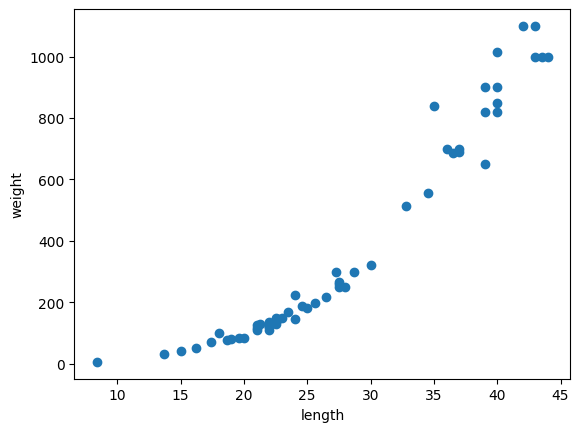

In [3]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 훈련 세트 준비

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# scikit-learn의 모델들은 입력 데이터가 2차원 배열
train_input = train_input.reshape(-1, 1) # -1 : 나머지 차원을 사용하고 남은 거를 여기에 할당
test_input = test_input.reshape(-1, 1)

#### 회귀 모델 훈련

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target) # R^2 결정계수(회귀에서 사용, 1에 가까울 수록 좋음)

0.992809406101064

In [6]:
from sklearn.metrics import mean_absolute_error # 평균 절댓값 오차

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction) # 예측 값과 실제 값의 오차의 절댓값
mae

np.float64(19.157142857142862)

#### 과대적합과 과소적합

In [7]:
train_score = knr.score(train_input, train_target)
test_score = knr.score(test_input, test_target)
 
print(train_score, test_score)

# test가 train보다 더 높음 -> 훈련 세트를 적절히 학습하지 못함 -> 과소적합
# train이 test보다 훨씬 더 높음 -> 훈련 세트를 너무 학습함 -> 과대적합

0.9698823289099254 0.992809406101064


#### 이웃 개수 줄이기
- 이웃의 개수가 많을 수록 과소적합
- 이웃의 개수가 적을 수록 과대적합

In [8]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

train_score = knr.score(train_input, train_target)
test_score = knr.score(test_input, test_target)
 
print(train_score, test_score)

# test가 train보다 더 높음 -> 훈련 세트를 적절히 학습하지 못함 -> 과소적합
# train이 test보다 훨씬 더 높음 -> 훈련 세트를 너무 학습함 -> 과대적합

0.9804899950518966 0.9746459963987609


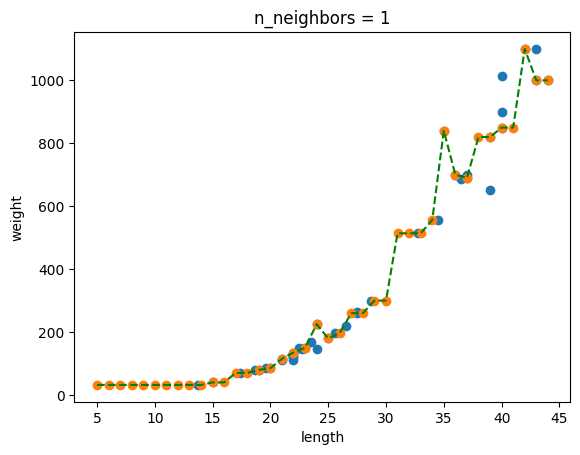

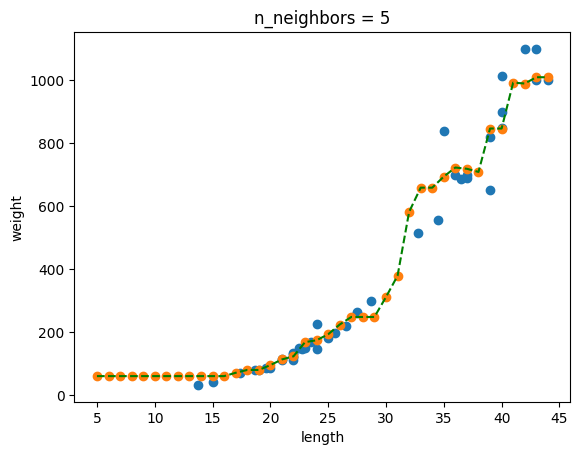

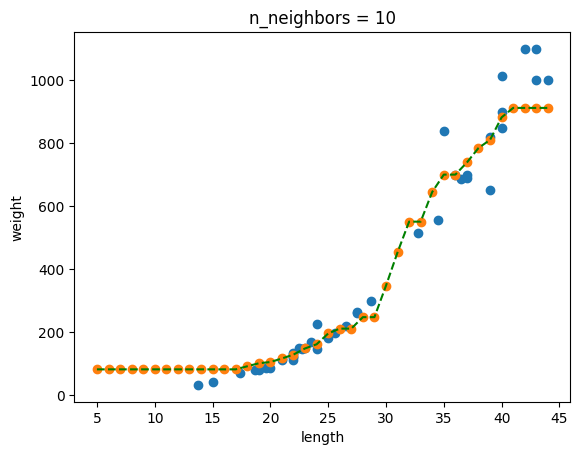

In [9]:
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그리기
for n in [1,5,10]:
  # 모델 훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정한 범위 x에 대한 예측
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.scatter(x, prediction)    
  plt.plot(x, prediction, color='green', linestyle='--', label='회귀선')
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

### 선형 회귀

##### 아주 큰 농어 -> 가장 가까운 데이터를 사용하기 때문에 값이 차이가 많이 날 경우 예측이 크게 빗나감
- 샘플 범위 바깥의 값을 예측하기 어려움

In [10]:
# 아주 큰 농어
knr.predict([[50]])

array([912.5])

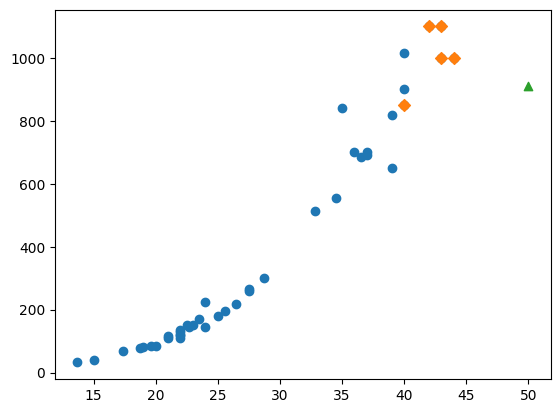

In [11]:
# 50cm 노어의 이웃을 구함
knr.n_neighbors = 5
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 912, marker='^')
plt.show()

#### 선형 회귀

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_) # 기울기 : 39, y절편 : -709

[1241.83860323]
[39.01714496] -709.0186449535474


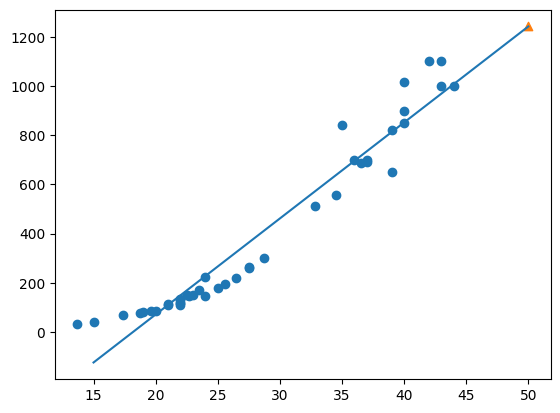

0.9398463339976041
0.824750312331356


In [13]:
# 학습한 직선 그리기
## 훈련 세트의 산점도
plt.scatter(train_input, train_target)

## 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

## 50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^')
plt.show()

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) # 성능이 별로 -> 과소적합

#### 다항 회귀

In [14]:
train_poly = np.concatenate([train_input ** 2, train_input], axis=1) # np.column_stack((train_input ** 2, train_input))
test_poly = np.concatenate([test_input ** 2, test_input], axis=1)

In [15]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_) # 1.01 * 길이^2 -21.5 * 길이 + 116.05

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278264


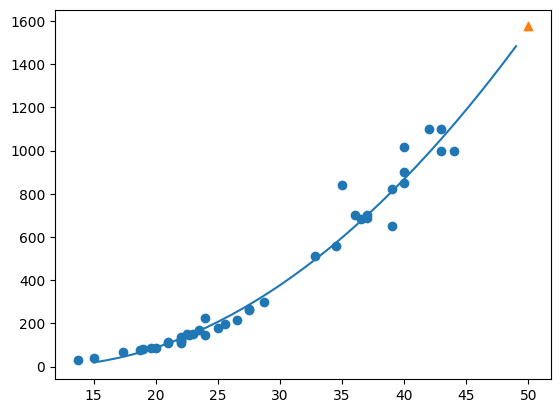

0.9706807451768623
0.9775935108325122


In [16]:
# 학습한 직선 그리기
## 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듦
point = np.arange(15, 50)

## 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

## 15에서 49까지 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

## 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

### 다중 회귀과 규제
- 특성 공학 : 기존의 특성을 사용해 새로운 특성을 만듦(머신 러닝에서 중요)

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()

perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [19]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [20]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [21]:
# 변환기 예시
from sklearn.preprocessing import PolynomialFeatures 
## 변환기 : 특성을 만들거나 전처리 하기 위한 클래스(fit, transform)
## 추정기 : LinearRegression, KN-, ...(fit, predict, score)

## degree = 2 : 거듭제곱까지 만듦
poly = PolynomialFeatures()
poly.fit([[2,3]]) # 2개의 특성(2,3)으로 이루어진 샘플 하나를 적용
## 1(bias), 2, 3, 2 ** 2, 2 * 3, 3 ** 2
## linear regression은 1(bias)를 무시

print(poly.transform([[2,3]])) # 실제로 배열을 만듦

[[1. 2. 3. 4. 6. 9.]]


In [22]:
poly = PolynomialFeatures(include_bias=False) # 1(bias)를 뺌

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성들 출력
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594145


#### 더 많은 특성 만들기

In [24]:
poly = PolynomialFeatures(degree = 5, include_bias=False) # 1(bias)를 뺌

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape) # 특성 개수

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 굉장히 안좋은 점수 -> 과대적합 : 데이터의 개수는 45개인데 특성의 개수는 55개

(42, 55)
0.9999999999996176
-144.40585108215134


#### 규제 : 과대적합을 줄임 - 가중치 값을 줄여서 일반화된 모델을 만듦(가중치가 클 때 벌칙을 줌)
모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절
- alpha 값은 사전에 우리가 지정해야 하는 값(하이퍼파라미터)
- alpha 값이 크면 규제의 강도가 세짐 -> 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해짐(과대적합될 가능성 ↑)
<hr/>

- 릿지 회귀 : 
  - alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도하여 과대적합을 완화
  - 가중치의 제곱을 벌칙으로 사용(L2규제) - 더 선호
- 라쏘 회귀 : 
  - 계수 값을 아예 0으로 만들 수 있음
  - 가중치의 절대값을 벌칙으로 사용(L1규제)

In [25]:
# 규제 전에 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # alpha=1이 기본
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

##### 릿지 회귀

In [26]:
# 릿지 회귀
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615379


In [27]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  # 릿지 모델을 만듦
  ridge = Ridge(alpha = alpha)

  # 릿지 모델을 훈련
  ridge.fit(train_scaled, train_target)

  # 훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

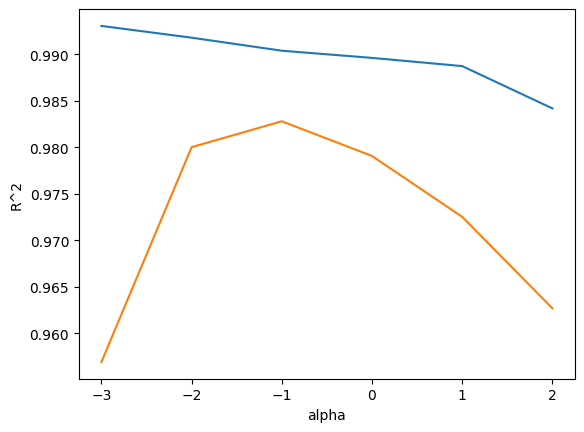

In [28]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

##### 라쏘 회귀

In [29]:
# 릿지 회귀
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [30]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  # 릿지 모델을 만듦
  lasso = Lasso(alpha = alpha)

  # 릿지 모델을 훈련
  lasso.fit(train_scaled, train_target)

  # 훈련 점수와 테스트 점수를 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

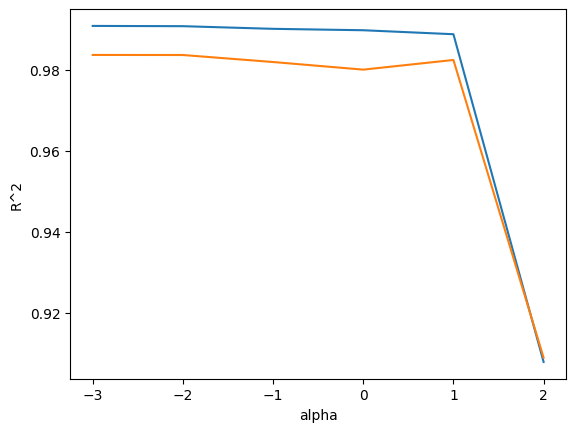

In [31]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [32]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
print(np.sum(lasso.coef_ == 0)) # 55개의 특성 중 44개를 사용하지 않음(alpha로 인해 사용안함)

0.9888067471131867
0.9824470598706695
40
